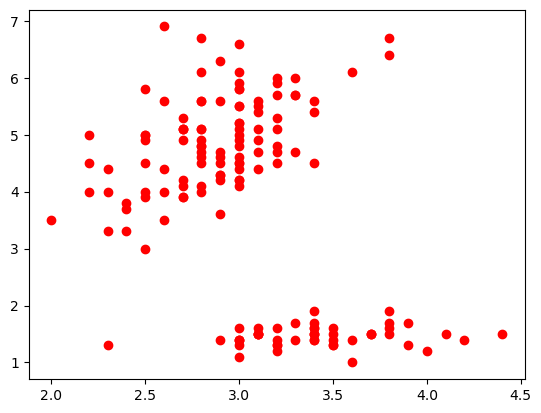

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
f=open('iris.data')
data=pd.read_csv('iris.data')
data=data.to_numpy()


# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode the last column
df.iloc[:, -1] = df.iloc[:, -1].astype("category").cat.codes

# Convert back to NumPy array (optional)
data = df.to_numpy()
y_train,x_train=data[:,-1],data[:,1:4]
l=[]
for i in range(len(y_train)):
    if y_train[i]>1:
        break
    l.append(y_train[i])
plt.scatter(x_train[:,0],x_train[:,1],c='r')
plt.show()
l=np.array(l)
    

In [50]:
#Sigmoid function
def sigmoid(f_wb):
    f_wb=1/(1+np.exp(-f_wb))
    return f_wb


In [81]:
#Linear regression function without regularization
a=0.01 #alpha for regularization
L=0.04
w=np.zeros(x_train.shape[1])
b=0
def linear(x_train,l,w,b,L):
    m=x_train.shape[1]
    loss=0
    cost=0
    for i in range(len(l)):
        f_wb=np.dot(x_train[i],w)+b
        z=sigmoid(f_wb)
        loss=-l[i]*np.log(z)-(1-l[i])*np.log(1-z)
        cost+=loss
        for j in range(m):
            w[j]-=L*(1/len(l)*((z-l[i])*x_train[i,j]))
        b-=L*(1/len(l)*(z-l[i]))
    cost=cost/len(l)
    return w,b,cost

        
    
    

In [82]:
#Training model with 1000 iterations
costl=[] #List for plotting the cost function
def train(x_train,l,w,b,L):
    iterations=10000
    for epoch in range(iterations):
        w,b,cost=linear(x_train,l,w,b,L)
        if epoch%100==0:
            print('epoch=', epoch,'cost=', cost)
        costl.append(cost)
    return w,b,costl
train(x_train,l,w,b,L)  

epoch= 0 cost= 0.6807429994006523
epoch= 100 cost= 0.16090227605169774
epoch= 200 cost= 0.08776158466743127
epoch= 300 cost= 0.06043373327944895
epoch= 400 cost= 0.04623151098822442
epoch= 500 cost= 0.03753323952390101
epoch= 600 cost= 0.03165474735318909
epoch= 700 cost= 0.027412465432397448
epoch= 800 cost= 0.024204061273989264
epoch= 900 cost= 0.021690769960789415
epoch= 1000 cost= 0.019667446484066164
epoch= 1100 cost= 0.018002580671360107
epoch= 1200 cost= 0.01660796198246896
epoch= 1300 cost= 0.01542220070357052
epoch= 1400 cost= 0.014401244388000682
epoch= 1500 cost= 0.01351265399613134
epoch= 1600 cost= 0.012732008385553698
epoch= 1700 cost= 0.012040567543952689
epoch= 1800 cost= 0.011423708648084466
epoch= 1900 cost= 0.010869852228580227
epoch= 2000 cost= 0.010369708071200185
epoch= 2100 cost= 0.009915734981679436
epoch= 2200 cost= 0.009501746807760615
epoch= 2300 cost= 0.009122620489092494
epoch= 2400 cost= 0.008774076564153185
epoch= 2500 cost= 0.00845251197274248
epoch= 260

(array([-3.37928592,  3.57583726,  1.72355287]),
 -0.7448346276096108,
 [0.6807429994006523,
  0.6589782033658103,
  0.6400847191065401,
  0.623191345530907,
  0.6077266860260352,
  0.5933178081415895,
  0.5797212733869647,
  0.5667774383885387,
  0.5543806205158432,
  0.5424597785435257,
  0.5309660595607095,
  0.5198647952725308,
  0.509130370761167,
  0.49874294428809907,
  0.4886863585708939,
  0.4789468180083994,
  0.469512057311065,
  0.4603708243741678,
  0.4515125630981685,
  0.4429272224956156,
  0.4346051447173838,
  0.42653700165335734,
  0.4187137607798043,
  0.41112666804684855,
  0.40376724019022486,
  0.3966272617984998,
  0.3896987843467267,
  0.3829741255956245,
  0.37644586849659956,
  0.3701068591967643,
  0.36395020400837796,
  0.35796926536125984,
  0.35215765683839173,
  0.3465092374322256,
  0.34101810517011755,
  0.3356785902532293,
  0.3304852478412359,
  0.32543285059964877,
  0.3205163811100421,
  0.31573102422747473,
  0.3110721594546457,
  0.306535353389211

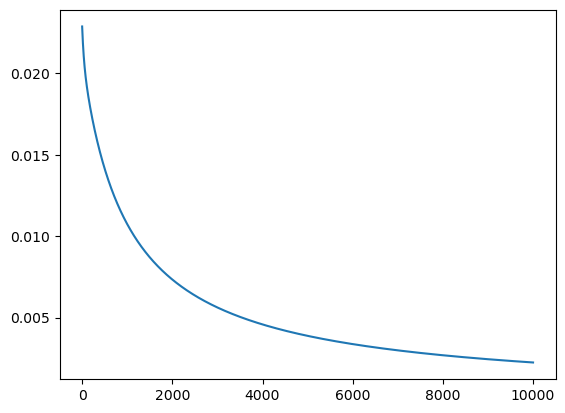

In [73]:
plt.plot(range(len(costl)),costl)
plt.show()

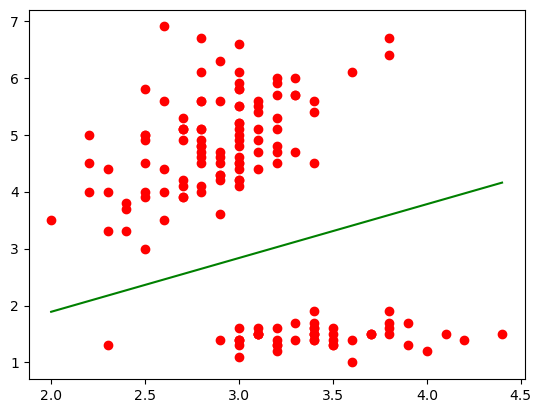

In [83]:
plt.scatter(x_train[:,0],x_train[:,1],c='r')
x1_values = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 100)
x2_values = -(w[0] / w[1]) * x1_values - (b / w[1])
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')
plt.show()